# Comparison of Original IForestASD, SADWIN IFA, PADWIN IFA, and NDKSWIN

## Install skmultiflow if needed
You need to install git

In [1]:
#print("scikit-multiflow package installation")
#!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [2]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [3]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime
import pandas as pd
#from skmultiflow.data import AnomalySineGenerator

## General parameters for the evaluation

In [13]:
#************************ Execution settings *******************************
window_sizes = [100] # Number of sample in one window, window size.
n_estimators = [30] # Number of itree in the random forest
execution_number = 1 # Number of execution because of the random character of IForest
anomaly_threshold = 0.5 # Anomaly threshold to decide which is anomaly or not
max_sample = 1000 # Total size of data to examine (windows number = max_sample/window)
n_wait = max_sample # The evaluation step size
# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy', 'f1', 'precision', 'recall', 'true_vs_predicted', 'kappa', 'kappa_m', 'running_time', 'model_size']

#************************ Stream data settings *******************************
window_save_size = 100
window_number = round((max_sample/window_save_size),0) # The number of window to save on .csv file

# Parameters for NDWSIN IFA
alpha=0.01
n_dimensions=2 # Number of dimensions to use for the test of the drift concept
n_tested_samples=0.1 # Percentage of data to pick in the window to test the drift concept
fixed_checked_dimension = False # IF False, dimension will be choose randomly, if not on the 
fixed_checked_sample=False

#execution_results = pd.DataFrame()
#updated_results = pd.DataFrame()

## Execution Function

In [14]:
def execute_comparision():
    for window in window_sizes:
        for n_estimator in n_estimators:
            print("")
            print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
            result_folder_path = func.run_IForestASDs_comparison(execution_number=execution_number, stream=stream3, stream_n_features=stream.n_features, window = window, 
                             estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                             result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics,
                             #n_estimators_updated=n_estimators_updated, updated_randomly=updated_randomly,
                            alpha=alpha, n_dimensions=n_dimensions, n_tested_samples=n_tested_samples,
                            fixed_checked_dimension = fixed_checked_dimension, fixed_checked_sample=fixed_checked_sample)
    
    #directory_path = 'results/'+str(test_name)
    execution_results, updated_results = func.merge_file2(folder_path=result_folder_path, output_file = 'output',skiprows=(4 + 4))
    func.print_graphics(execution_resuts=execution_results, updated_results=updated_results)

In [15]:
def execute_comparision2():
    for window in window_sizes:
        for n_estimator in n_estimators:
            print("")
            print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
            func.run_IForestASDs_comparison2(execution_number=execution_number, stream=stream2, 
                                            stream_n_features=stream.n_features, window = window, 
                             estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                             result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics,
                             #n_estimators_updated=n_estimators_updated, updated_randomly=updated_randomly,
                            alpha=alpha, n_dimensions=n_dimensions, n_tested_samples=n_tested_samples,
                            fixed_checked_dimension = fixed_checked_dimension, fixed_checked_sample=fixed_checked_sample)
    
    directory_path = 'results/'+str(test_name)
    func.merge_file2(folder_path=directory_path, output_file = 'output.csv',skiprows=(4 + 4))

## Applied On Simple Stream Dataset
### Idea and waitting results
### Results
#### Model updating
#### Method performances

### Summary


******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


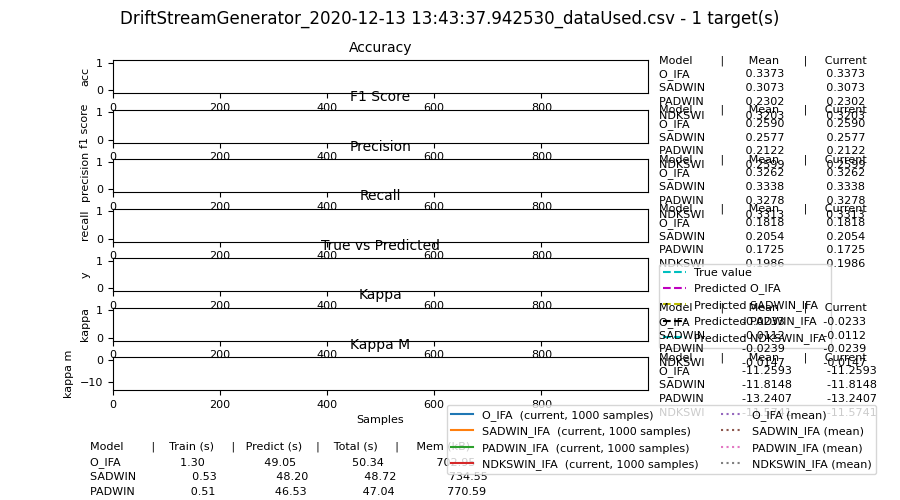

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [28.13s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [49.11s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [71.57s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [92.15s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [112.82s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [135.58s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [155.07s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [

In [16]:
dataset_name = "SMTP"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.03
stream = func.get_dataset(dataset_name=dataset_name)

#execute_comparision()
execute_comparision2()


Please find the data used on results/DriftStreamGenerator_2020-12-13 13:43:37.942530/DriftStreamGenerator_2020-12-13 13:43:37.942530_dataUsed.csv

******************************** Window = 50 and n_estimator = 5 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


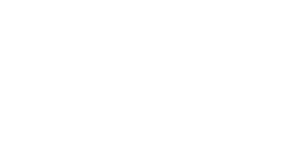

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [1.03s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ###----------------- [15%] [2.04s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [3.01s]
The model was updated by training a new iForest with the version : AnomalyRate
 #####--------------- [25%] [4.02s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [5.06s]
The model was updated by training a new iForest with the version : AnomalyRate
 #######------------- [35%] [6.04s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [7.17s]
The model was updated by training a new iForest with the version : AnomalyRate
 #########----------- [45%] [8.27s]
The

In [7]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 9, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 175, drift_width = 100, n_num_features = 2, n_cat_features = 0)
file_path = func.save_stream_data_generated(stream=stream, window = window_save_size, 
                                                result_folder=test_name, window_number = window_number)
stream2, stream3, stream4 = func.get_file_stream2(path=file_path)

#execute_comparision()
execute_comparision2()

In [8]:
dataset_name = "Generator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0,noise_percentage=0.1, random_state=1)

file_path = func.save_stream_data_generated(stream=stream, window = window_save_size, 
                                                result_folder=test_name, window_number = window_number)
stream2, stream3, stream4 = func.get_file_stream2(path=file_path)

execute_comparision()
execute_comparision2()

SyntaxError: invalid syntax (<ipython-input-8-81d8873f9b5c>, line 7)

SyntaxError: invalid syntax (<ipython-input-8-81d8873f9b5c>, line 7)